# Naive-Bayes Classifier From Scratch

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_style("darkgrid")

In [42]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


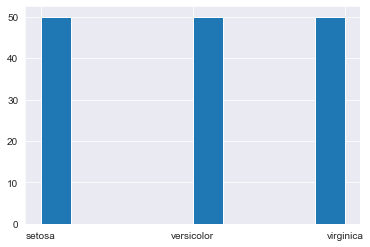

In [43]:
iris['species'].hist()

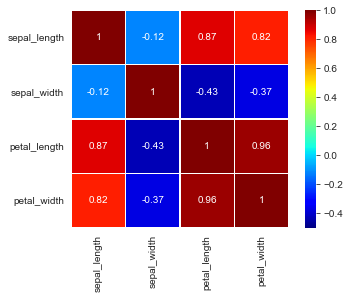

In [44]:
corr = iris.iloc[:,:-1].corr(method="pearson")
cmap = 'jet'
sns.heatmap(corr, vmax = 1, vmin = -.5, cmap=cmap, square=True, linewidths=.2, annot = True)

In [45]:
data = iris[['sepal_length','sepal_width','species']]
data.head(10)

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
5,5.4,3.9,setosa
6,4.6,3.4,setosa
7,5.0,3.4,setosa
8,4.4,2.9,setosa
9,4.9,3.1,setosa


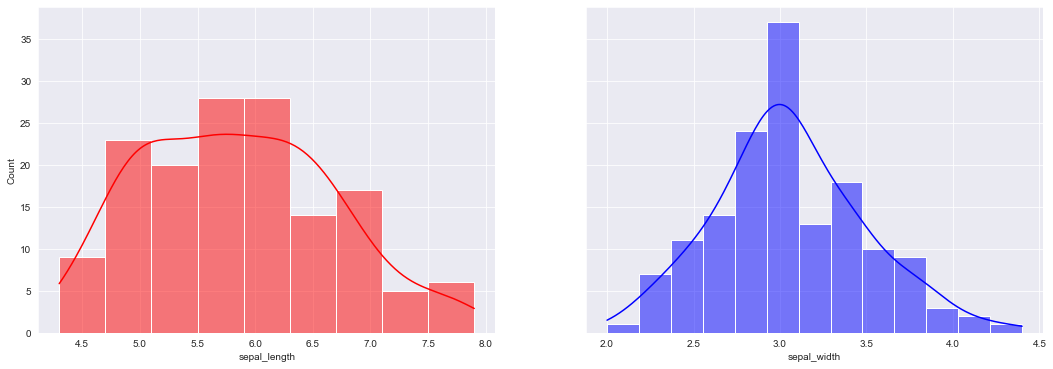

In [46]:
fig, axes = plt.subplots(1, 2, figsize = (18,6), sharey =True)
sns.histplot(data, ax = axes[0], x="sepal_length", kde=True, color='r');
sns.histplot(data, ax = axes[1], x="sepal_width", kde=True, color='b');

Código para transformar a coluna 'species' em variável numérica

In [47]:
#sorted(data['species'].unique())
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(data['species'])
#list(labelEncoder.classes_)
speciesIndex = labelEncoder.transform(data['species'])
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


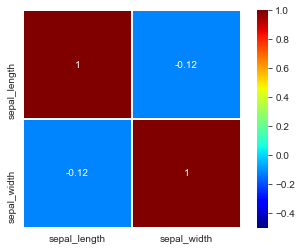

In [93]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = 'jet'
sns.heatmap(corr, vmax = 1, vmin = -.5, cmap=cmap, square=True, linewidths=.2, annot = True)

In [48]:
data['species_index'] = speciesIndex
data.drop(columns = 'species', inplace=True)

<ipython-input-48-67cb218e98f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species_index'] = speciesIndex
C:\Users\Victor\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
data.head()

,sepal_length,sepal_width,species_index
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [50]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y] == i])/len(df))
    return prior

In [51]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y] == label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1/(np.sqrt(2*np.pi)*std)) * np.exp(-((feat_val - mean)**2/(2*std**2)))
    return p_x_given_y

In [52]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
        
        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [60]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = .2, random_state = 41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X = X_test, Y ='species_index')



In [64]:
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred,average='macro'))

[[8 1 0]
 [0 9 2]
 [0 5 5]]
0.7405731523378583


Text(34.0, 0.5, 'True Class')

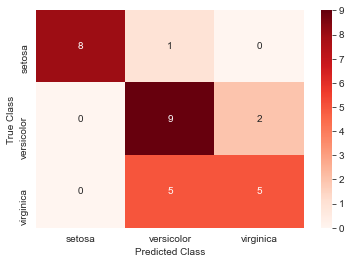

In [91]:
categoricalLabel = labelEncoder.classes_
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap='Reds', annot=True, xticklabels=categoricalLabel, yticklabels=categoricalLabel);
plt.xlabel('Predicted Class')
plt.ylabel('True Class')


In [75]:
speciesIndex

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(34.0, 0.5, 'True Class')

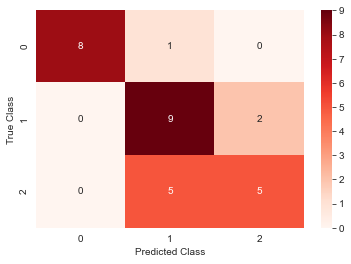

In [85]:
labels_test = labelEncoder.inverse_transform(Y_test)
labels_pred = labelEncoder.inverse_transform(Y_pred)

sns.heatmap(confusion_matrix(labels_test, labels_pred), cmap='Reds', annot=True);
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [76]:
labelEncoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [78]:
Y_test

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1])

In [79]:
Y_pred

array([1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 2, 1, 0, 1], dtype=int32)